___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Ingest the data to notebook

In [8]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df = df.astype({"sex": str, "cp": str,"fbs": str, "restecg":str, "exang":str,"slope":str, "thal":str, })


In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
df.shape

(303, 20)

In [16]:
df.dtypes

age            int64
trestbps       int64
chol           int64
thalach        int64
oldpeak      float64
ca             int64
target         int64
sex_1          uint8
cp_1           uint8
cp_2           uint8
cp_3           uint8
fbs_1          uint8
restecg_1      uint8
restecg_2      uint8
exang_1        uint8
slope_1        uint8
slope_2        uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

# EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   ca         303 non-null    int64  
 6   target     303 non-null    int64  
 7   sex_1      303 non-null    uint8  
 8   cp_1       303 non-null    uint8  
 9   cp_2       303 non-null    uint8  
 10  cp_3       303 non-null    uint8  
 11  fbs_1      303 non-null    uint8  
 12  restecg_1  303 non-null    uint8  
 13  restecg_2  303 non-null    uint8  
 14  exang_1    303 non-null    uint8  
 15  slope_1    303 non-null    uint8  
 16  slope_2    303 non-null    uint8  
 17  thal_1     303 non-null    uint8  
 18  thal_2     303 non-null    uint8  
 19  thal_3     303 non-null    uint8  
dtypes: float64

In [18]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554,0.683168,0.165017,0.287129,0.075908,0.148515,0.501650,0.013201,0.326733,0.462046,0.468647,0.059406,0.547855,0.386139
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835,0.466011,0.371809,0.453171,0.265288,0.356198,0.500824,0.114325,0.469794,0.499382,0.499842,0.236774,0.498528,0.487668
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


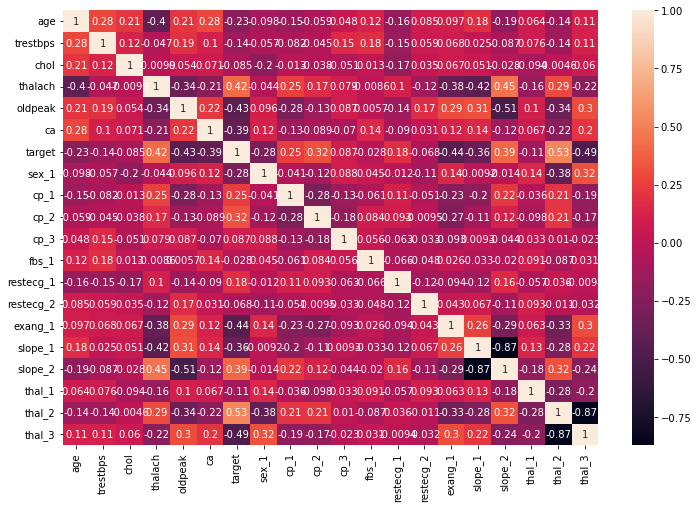

In [19]:
sns.heatmap(df.corr(), annot=True);

# Data Preprocessing

In [20]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2',
       'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
X = df.drop('target',axis=1)
y = df['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_model=LogisticRegression()

In [28]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
y_pred=log_model.predict(X_test_scaled)

In [30]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [31]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target,pred,pred_proba
284,61,140,207,138,1.9,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0.030788
118,46,105,204,172,0.0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,1,0.983648
17,66,150,226,114,2.6,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0.943913
109,50,110,254,159,0.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0.936237
300,68,144,193,141,3.4,2,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0.019392
19,69,140,239,151,1.8,2,0,0,0,1,...,0,0,0,1,0,1,0,1,1,0.903362
66,51,100,222,143,1.2,0,1,0,1,0,...,0,1,1,0,0,1,0,1,1,0.763611
30,41,105,198,168,0.0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,1,0.947285
84,42,102,265,122,0.6,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0.670600
272,67,120,237,71,1.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0.479512


# Implement KNN and Evaluate

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [36]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [37]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.6,0.4
1,0.4,0.6
2,0.2,0.8
3,1.0,0.0
4,0.0,1.0
...,...,...
86,1.0,0.0
87,0.4,0.6
88,0.4,0.6
89,0.8,0.2


In [38]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [39]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
283,0,0,0.4,0.6
118,1,1,1.0,0.0
158,1,0,0.2,0.8
57,1,0,0.4,0.6
272,0,1,0.6,0.4
132,1,1,1.0,0.0
137,1,1,0.8,0.2
176,0,0,0.2,0.8
281,0,0,0.4,0.6
5,1,0,0.4,0.6


In [40]:
from sklearn.model_selection import cross_val_score, cross_validate

In [41]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.000000,0.005984,0.818182,0.833333,0.833333,0.833333
2,0.000998,0.004987,0.863636,1.000000,0.750000,0.857143
3,0.000997,0.003990,0.809524,0.833333,0.833333,0.833333
4,0.000997,0.002992,0.809524,0.833333,0.833333,0.833333
5,0.000997,0.002992,0.714286,0.687500,0.916667,0.785714
6,0.000997,0.004987,0.809524,0.818182,0.818182,0.818182
7,0.000998,0.004987,0.809524,0.769231,0.909091,0.833333
8,0.000997,0.003989,0.952381,0.916667,1.000000,0.956522
9,0.000998,0.004496,0.761905,0.875000,0.636364,0.736842
10,0.000998,0.004985,0.857143,0.900000,0.818182,0.857143


In [42]:
df_scores.mean()[2:]

test_accuracy     0.820563
test_precision    0.846658
test_recall       0.834848
test_f1           0.834488
dtype: float64

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [45]:
confusion_matrix(y_test, y_pred)

array([[33,  8],
       [12, 38]], dtype=int64)

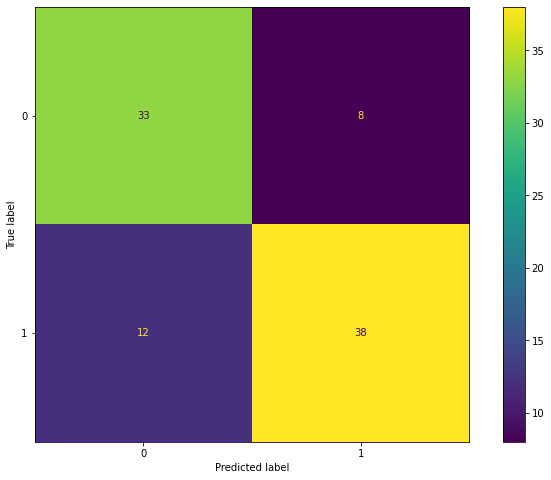

In [46]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [47]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  8]
 [12 38]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.83      0.76      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
knn_grid = KNeighborsClassifier()

In [50]:
k_values= range(1,30)

In [51]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [52]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [53]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [54]:
knn_grid_model.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}

In [55]:
print('WITH K=24\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=24

Test_Set

[[34  7]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91


Train_Set

[[79 18]
 [16 99]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        97
           1       0.85      0.86      0.85       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



In [56]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

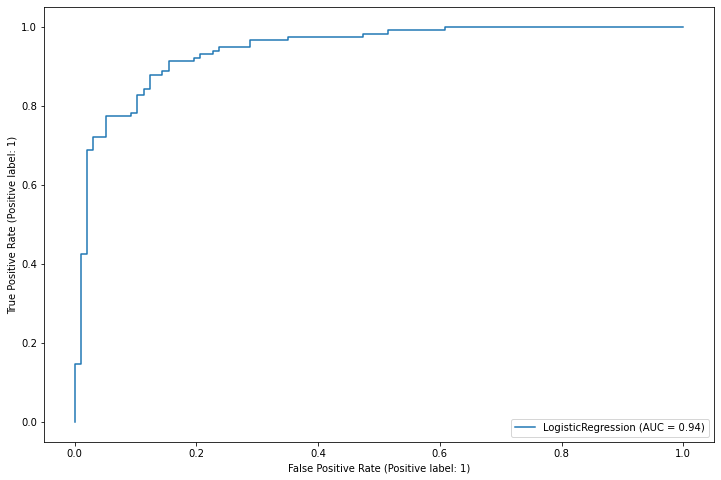

In [57]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [58]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [59]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [60]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

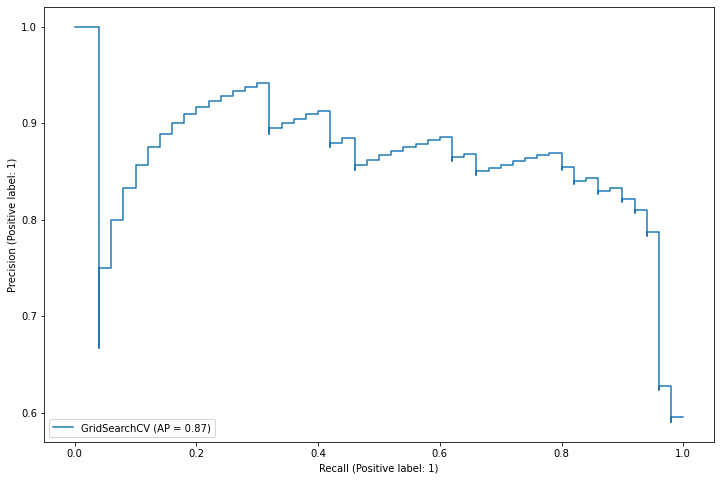

In [61]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

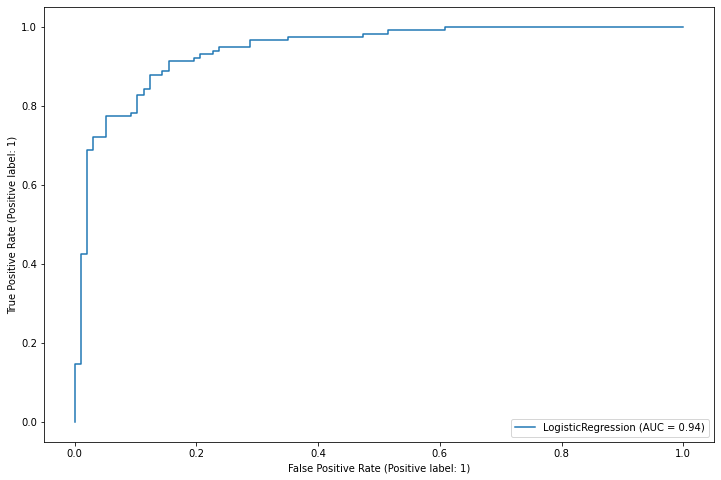

In [62]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [63]:
y_pred_proba = log_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.9416405199462125

In [64]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [65]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.49214848581338483

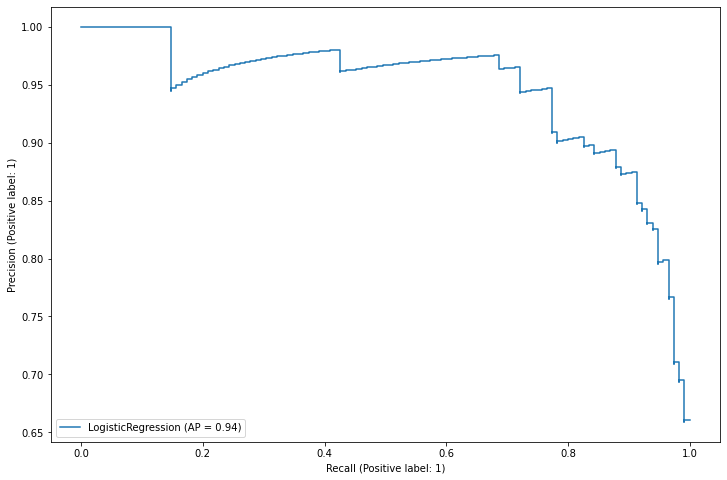

In [66]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [67]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9449907533506654

In [68]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [69]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.49214848581338483

In [70]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([0.23132004, 0.45081499, 0.59945303, 0.07028574, 0.83598581,
       0.89210877, 0.5731158 , 0.04871902, 0.14634108, 0.74057216,
       0.63446396, 0.29364325, 0.84464062, 0.16633147, 0.86202988,
       0.91629   , 0.85999371, 0.22493019, 0.05672309, 0.24007573,
       0.43027382, 0.17207542, 0.63554813, 0.61182284, 0.7594747 ,
       0.61572941, 0.81694837, 0.70607843, 0.08387164, 0.85383755,
       0.11993324, 0.16975504, 0.05159284, 0.42227097, 0.65481977,
       0.25348972, 0.80440268, 0.75194614, 0.33664002, 0.85596307,
       0.45390692, 0.68494826, 0.82741194, 0.81575575, 0.60665678,
       0.02415645, 0.3971583 , 0.8560143 , 0.12811157, 0.12968473,
       0.1349979 , 0.04604691, 0.63165454, 0.85532871, 0.30011853,
       0.04787716, 0.1404136 , 0.91027767, 0.11329651, 0.05355337,
       0.32499283, 0.84258357, 0.28764477, 0.75689945, 0.73557875,
       0.11614129, 0.75627817, 0.55523985, 0.73125525, 0.90830959,
       0.76504169, 0.85244882, 0.52108198, 0.85655048, 0.25874

In [71]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [72]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[33  8]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [73]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[ 78  19]
 [ 13 102]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        97
           1       0.84      0.89      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 

In [74]:
scaler = StandardScaler().fit(X)

In [75]:
import pickle
pickle.dump(scaler, open("scaler_diabates", 'wb'))

In [76]:
X_scaled = scaler.transform(X)

In [77]:
final_model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear').fit(X_scaled, y)

In [78]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

In [79]:
my_dict = {"age": [33, 16, 55],
           "sex": [1, 0, 1],
           "cp": [1, 2, 3],
           "threstbps": [123, 133, 145],
           "chol": [248, 232, 255],
           "fbs": [1, 0, 0],
           "restecg": [0, 0, 1],
           "thalach": [179, 160, 153],
           "exang": [0, 1, 1],
           "oldpeak": [2.9, 4.0, 3.3],           
           "slope": [1, 2, 2],
           "ca": [2, 3, 3],
           "thal": [2, 1, 3]
          }

In [82]:
samples = pd.DataFrame(my_dict)
samples

,age,sex,cp,threstbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,33,1,1,123,248,1,0,179,0,2.9,1,2,2
1,16,0,2,133,232,0,0,160,1,4.0,2,3,1
2,55,1,3,145,255,0,1,153,1,3.3,2,3,3


In [85]:
from sklearn.pipeline import Pipeline

In [86]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

In [87]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [91]:
pipe_model = Pipeline(steps=operations)

In [92]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [94]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [80]:
df.sample(10)

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
139,64,128,263,105,0.2,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1
1,37,130,250,187,3.5,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
204,62,160,164,145,6.2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
288,57,110,335,143,3.0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1
52,62,130,231,146,1.8,3,1,1,0,1,0,0,1,0,0,1,0,0,0,1
253,67,100,299,125,0.9,2,0,1,0,0,0,0,0,0,1,1,0,0,1,0
94,45,112,160,138,0.0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
227,35,120,198,130,1.6,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1
80,41,112,250,179,0.0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0
178,43,120,177,120,2.5,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1


In [98]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,threstbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,33,1,1,123,248,1,0,179,0,2.9,1,2,2
1,16,0,2,133,232,0,0,160,1,4.0,2,3,1
2,55,1,3,145,255,0,1,153,1,3.3,2,3,3
